# 1. Functions

## 1.1 Function to plot dual axis plots

In [1]:
import matplotlib.pyplot as plt

def plot_dual_axis(ax, x, param1, xlabel='X-axis', param2=None):
    color1 = 'tab:blue'
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Delay', color=color1)
    ax.plot(x, param1, 'o-', color=color1, label='Delay')
    ax.tick_params(axis='y', labelcolor=color1)

    if param2 is not None:
        color2 = 'tab:red'
        ax2 = ax.twinx()  # Create a second axis sharing the x-axis
        ax2.set_ylabel('Leakage', color=color2)
        ax2.plot(x, param2, 'o--', color=color2, label='Leakage')
        ax2.tick_params(axis='y', labelcolor=color2)

        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

## 1.2 Function to generate list of point to plot

In [2]:
def generate_points_within_range(start, end):
    step = (end - start) / 4
    points = [start + i * step for i in range(5)]
    return points

## 1.3 Function to extract corresponsing delay and leakage

In [3]:
import pandas as pd
import numpy as np

def nearest_values_average(df, numbers, column_name, target_column):
    outputs = []
    for number in numbers:
        nearest_index = (df[column_name] - number).abs().idxmin()  # Find index of nearest value
        nearest_value = df.loc[nearest_index, column_name]  # Get the nearest value
        nearest_indices = df.index[df[column_name] == nearest_value]  # Get indices of all occurrences of nearest value
        average_value = df.loc[nearest_indices, target_column].mean()  # Calculate average of corresponding values in target column
        outputs.append(average_value)
    return outputs


# 2. Generating the range list for 16 nm

In [4]:
temp_range = [-55,125]
temp_list = generate_points_within_range(temp_range[0],temp_range[1])

In [5]:
pvdd_range = [0.72,0.88]
pvdd_list = generate_points_within_range(pvdd_range[0],pvdd_range[1])

In [6]:
cqload_range = [0.1,5]
cqload_list = generate_points_within_range(pvdd_range[0],pvdd_range[1])

In [7]:
parameters = {
    'toxe': 6.5e-010,
    'toxm': 6.5e-010,
    'toxref': 6.7e-010,
    'toxp_par': 4e-010,
    'xj': 7.2e-009,
    'ndep': 1.2e+019
}

# Ranges for each parameter
ranges = {
    'toxe': (0.9 * parameters['toxe'], 1.1 * parameters['toxe']),
    'toxm': (0.9 * parameters['toxm'], 1.1 * parameters['toxm']),
    'toxref': (0.9 * parameters['toxref'], 1.1 * parameters['toxref']),
    'toxp_par': (0.9 * parameters['toxp_par'], 1.1 * parameters['toxp_par']),
    'xj': (0.9 * parameters['xj'], 1.1 * parameters['xj']),
    'ndep': (0.9 * parameters['ndep'], 1.1 * parameters['ndep'])
}

# Generate points within the specified ranges for each parameter
toxe_list = generate_points_within_range(*ranges['toxe'])
toxm_list = generate_points_within_range(*ranges['toxm'])
toxref_list = generate_points_within_range(*ranges['toxref'])
toxp_par_list = generate_points_within_range(*ranges['toxp_par'])
xj_list = generate_points_within_range(*ranges['xj'])
ndep_list = generate_points_within_range(*ranges['ndep'])

# 3. INVERTER

Loading the File path

In [8]:
file_path = "INVERTER_leakage.csv"  # Provide the path to your CSV file
df_inverter_leakage = pd.read_csv(file_path)

In [9]:
file_path = "INVERTER_delay.csv"  # Provide the path to your CSV file
df_inverter_delay = pd.read_csv(file_path)

## 3.1 Temparature

In [10]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_inverter_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)

## Delay List
target_column = 'delay_nodea'
delay_list_temp = nearest_values_average(df_inverter_delay, temp_list, column_name,target_column)
print(delay_list_temp)

[1.72436717448438e-07, 1.7706901299426014e-07, 1.6752174101694613e-07, 4.521907159622678e-07, 6.963827777500264e-07]
[4.6342645e-12, 6.355938000000001e-12, 8.5190955e-12, 6.266458e-12, 1.510755e-12]


## 3.2 Pvdd

In [11]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_inverter_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)

## Delay List
target_column = 'delay_nodea'
delay_list_pvdd = nearest_values_average(df_inverter_delay, pvdd_list, column_name,target_column)
print(delay_list_pvdd)

[1.1769712540077786e-07, 4.1643418483395806e-07, 3.659282626018565e-07, 2.1765307940685993e-07, 3.91308548981442e-07]
[8.495117999999999e-12, 6.4056090000000004e-12, 7.20088e-12, 2.8618885e-12, 7.8491435e-12]


## 3.3 Cqload

In [12]:
## Leakage List
column_name = 'Cqload'  # Specify the column name

## Delay List
target_column = 'delay_nodea'
delay_list_cqload = nearest_values_average(df_inverter_delay, cqload_list, column_name,target_column)
print(delay_list_cqload)

[2.2923405e-12, 2.382551e-12, 2.2787200000000002e-12, 2.3318420000000002e-12, 2.2834260000000002e-12]


## 3.4 toxe

In [13]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_inverter_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)

## Delay List
target_column = 'delay_nodea'
delay_list_toxe = nearest_values_average(df_inverter_delay, pvdd_list, column_name,target_column)
print(delay_list_toxe)

[1.403078190945645e-07, 1.0157996846471689e-07, 2.3963114488729746e-07, 3.686564352714766e-07, 1.9920275618914153e-07]
[2.068352e-12, 2.068352e-12, 2.068352e-12, 2.068352e-12, 2.068352e-12]


## 3.5 toxm

In [14]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_inverter_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)

## Delay List
target_column = 'delay_nodea'
delay_list_toxm = nearest_values_average(df_inverter_delay, toxm_list, column_name,target_column)
print(delay_list_toxm)

[3.6162454369991534e-07, 3.2593843662907084e-07, 2.6520398322246893e-07, 1.4763846421031818e-07, 2.1620506880372908e-07]
[7.9334175e-12, 5.950331e-12, 3.0372355000000007e-12, 5.430345e-12, 6.922743000000001e-12]


## 3.6 toxref

In [15]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_inverter_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)

## Delay List
target_column = 'delay_nodea'
delay_list_toxref = nearest_values_average(df_inverter_delay, toxref_list, column_name,target_column)
print(delay_list_toxref)

[2.6216231613556677e-07, 3.270372080141734e-07, 1.9288220169424221e-07, 2.730126914742373e-07, 5.44243474829525e-07]
[4.873686e-12, 3.109381e-12, 5.868679e-12, 1.354811e-12, 4.1761625e-12]


## 3.7 toxp

In [16]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_inverter_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)

## Delay List
target_column = 'delay_nodea'
delay_list_toxp = nearest_values_average(df_inverter_delay, toxp_par_list, column_name,target_column)
print(delay_list_toxp)

[4.625420050558413e-07, 1.6898768489837817e-07, 6.134034092305717e-07, 1.9642359686379181e-07, 5.17877153145569e-07]
[1.217108e-12, 5.0455290000000004e-12, 6.143004e-12, 4.2877e-12, 5.5003775e-12]


## 3.8 xj

In [17]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_inverter_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)

## Delay List
target_column = 'delay_nodea'
delay_list_xj = nearest_values_average(df_inverter_delay, xj_list, column_name,target_column)
print(delay_list_xj)

[1.464275262388506e-07, 4.1981705429223565e-07, 2.1364140844789892e-07, 1.8556091412147073e-07, 3.957708900656395e-07]
[6.7511955e-12, 1.987497e-12, 1.8875065000000003e-12, 2.719549e-12, 5.283602500000001e-12]


## 3.9 ndep

In [18]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_inverter_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)

## Delay List
target_column = 'delay_nodea'
delay_list_ndep = nearest_values_average(df_inverter_delay, ndep_list, column_name,target_column)
print(delay_list_ndep)

[4.943911854231098e-07, 3.279722515972807e-07, 4.138569826035619e-07, 2.462221868874919e-07, 2.920091410421124e-07]
[7.789521000000001e-12, 3.0201695e-12, 5.6298205e-12, 6.859889e-12, 5.728078e-12]


## 3.10 Plotting all plots

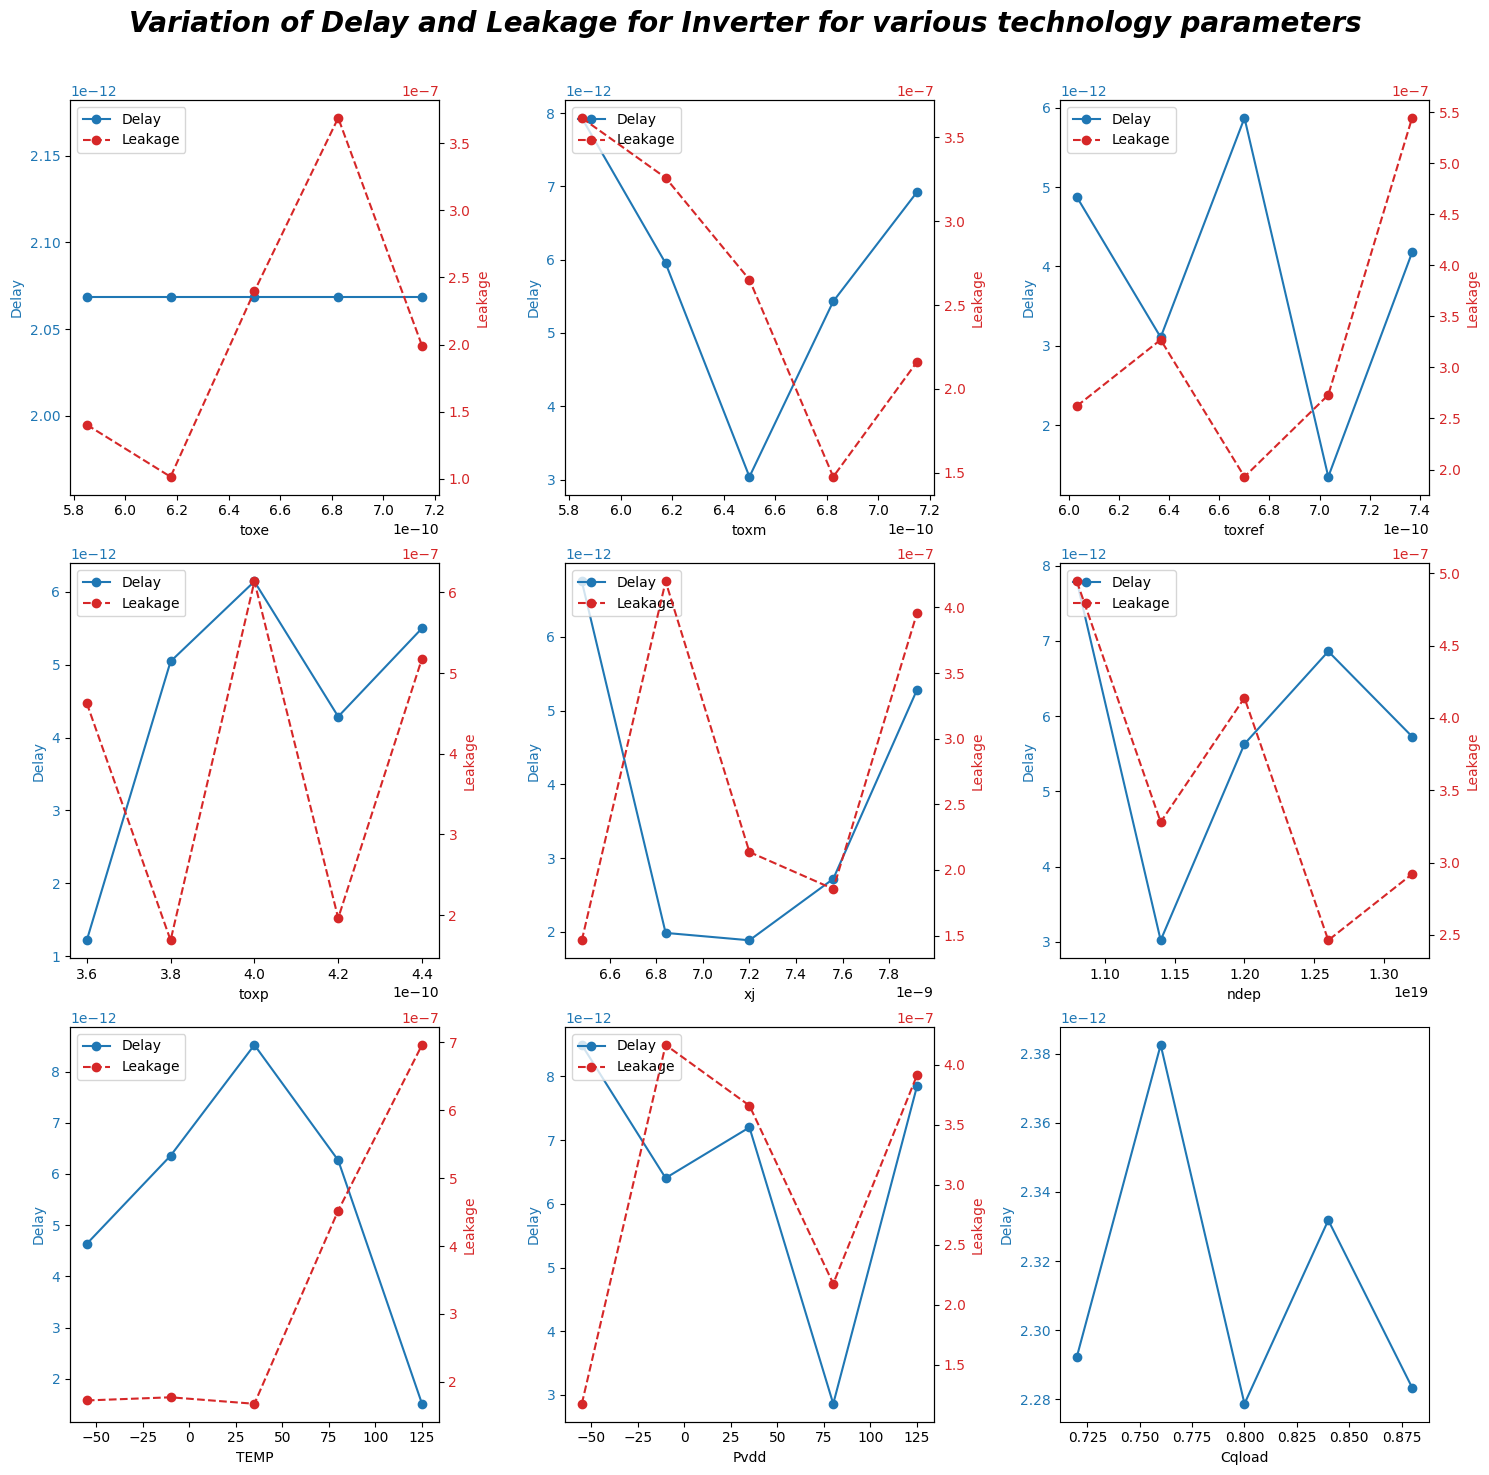

In [19]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data1 = [
    (axs[0, 0], toxe_list, delay_list_toxe, 'toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, delay_list_toxm, 'toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, delay_list_toxref, 'toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, delay_list_toxp, 'toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, delay_list_xj, 'xj', leakage_list_xj),
    (axs[1, 2], ndep_list, delay_list_ndep, 'ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, delay_list_temp, 'TEMP', leakage_list_temp),
    (axs[2, 1], temp_list, delay_list_pvdd, 'Pvdd', leakage_list_pvdd),
    (axs[2, 2], cqload_list, delay_list_cqload, 'Cqload', None)
]

for ax, x, param1, xlabel, param2 in data1:
    plot_dual_axis(ax, x, param1, xlabel, param2)

plt.tight_layout()
fig.suptitle('Variation of Delay and Leakage for Inverter for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.savefig('Dual_axis_plots/22_nm_MGK_Inverter.png')
plt.show()


# 4. AND2

Loading the File path

In [20]:
file_path = "AND_2_leakage.csv"  # Provide the path to your CSV file
df_and2_leakage = pd.read_csv(file_path)

In [21]:
file_path = "AND_2_delay.csv"  # Provide the path to your CSV file
df_and2_delay = pd.read_csv(file_path)

## 4.1 Temparature

In [22]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_and2_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)

## Delay List
target_column = 'delay_nodea'
delay_list_temp = nearest_values_average(df_and2_delay, temp_list, column_name,target_column)
print(delay_list_temp)

[8.315755877783446e-07, 8.386973433632421e-07, 7.350296325409484e-07, 1.8400903587569785e-06, 2.6542363547098927e-06]
[7.7709745e-12, 1.00058955e-11, 1.2736915e-11, 9.8793915e-12, 4.445626e-12]


## 4.2 Pvdd

In [23]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_and2_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)

## Delay List
target_column = 'delay_nodea'
delay_list_pvdd = nearest_values_average(df_and2_delay, pvdd_list, column_name,target_column)
print(delay_list_pvdd)

[5.518924004856471e-07, 1.5894368371456402e-06, 1.4812982237210632e-06, 1.0261025243028071e-06, 1.6783449881055748e-06]
[1.2999725e-11, 9.937385e-12, 1.1159715e-11, 6.6717445e-12, 1.160018e-11]


## 4.3 Cqload

In [24]:
## Leakage List
column_name = 'Cqload'  # Specify the column name

## Delay List
target_column = 'delay_nodea'
delay_list_cqload = nearest_values_average(df_and2_delay, cqload_list, column_name,target_column)
print(delay_list_cqload)

[5.720685e-12, 5.952397e-12, 5.5682055e-12, 5.63881e-12, 5.445107000000001e-12]


## 4.4 toxe

In [25]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_and2_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)

## Delay List
target_column = 'delay_nodea'
delay_list_toxe = nearest_values_average(df_and2_delay, pvdd_list, column_name,target_column)
print(delay_list_toxe)

[6.322673823870938e-07, 4.955655827354112e-07, 1.1186093533245988e-06, 1.534050426627037e-06, 8.526753200472232e-07]
[5.420892e-12, 5.420892e-12, 5.420892e-12, 5.420892e-12, 5.420892e-12]


## 4.5 toxm

In [26]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_and2_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)

## Delay List
target_column = 'delay_nodea'
delay_list_toxm = nearest_values_average(df_and2_delay, toxm_list, column_name,target_column)
print(delay_list_toxm)

[1.4921166235123051e-06, 1.3938627722884185e-06, 1.0538803798217251e-06, 7.143538507901113e-07, 1.0434498544938215e-06]
[1.192661e-11, 9.2580825e-12, 6.229567e-12, 9.2855985e-12, 1.02598075e-11]


## 4.6 toxref

In [27]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_and2_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)

## Delay List
target_column = 'delay_nodea'
delay_list_toxref = nearest_values_average(df_and2_delay, toxref_list, column_name,target_column)
print(delay_list_toxref)

[1.1919324618506535e-06, 1.3493007387970488e-06, 9.15275251367099e-07, 1.1906595847890618e-06, 2.087893900906983e-06]
[7.813355e-12, 6.1037094999999985e-12, 9.4459085e-12, 4.758165500000001e-12, 7.763080499999999e-12]


## 4.7 toxp

In [28]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_and2_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)

## Delay List
target_column = 'delay_nodea'
delay_list_toxp = nearest_values_average(df_and2_delay, toxp_par_list, column_name,target_column)
print(delay_list_toxp)

[1.7141398006145885e-06, 8.020252979423536e-07, 2.2621153911881433e-06, 9.57873814600123e-07, 1.99255532949602e-06]
[3.8181905e-12, 8.995701000000001e-12, 9.0967885e-12, 7.7681035e-12, 8.4533825e-12]


## 4.8 xj

In [29]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_and2_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)

## Delay List
target_column = 'delay_nodea'
delay_list_xj = nearest_values_average(df_and2_delay, xj_list, column_name,target_column)
print(delay_list_xj)

[6.79633147485826e-07, 1.6292221762952113e-06, 1.0103887256568395e-06, 9.06357203242125e-07, 1.5629097736763008e-06]


[9.883069e-12, 4.3234885e-12, 5.041155e-12, 6.121914e-12, 8.586594e-12]


## 4.9 ndep

In [30]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_and2_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)

## Delay List
target_column = 'delay_nodea'
delay_list_ndep = nearest_values_average(df_and2_delay, ndep_list, column_name,target_column)
print(delay_list_ndep)

[1.9892203877169066e-06, 1.3697141192244234e-06, 1.6556480634059205e-06, 1.0638536144267794e-06, 1.1337874584129714e-06]
[1.1457835e-11, 6.336407e-12, 9.1734785e-12, 1.1157375e-11, 9.3143565e-12]


## 4.10 Plotting all plots

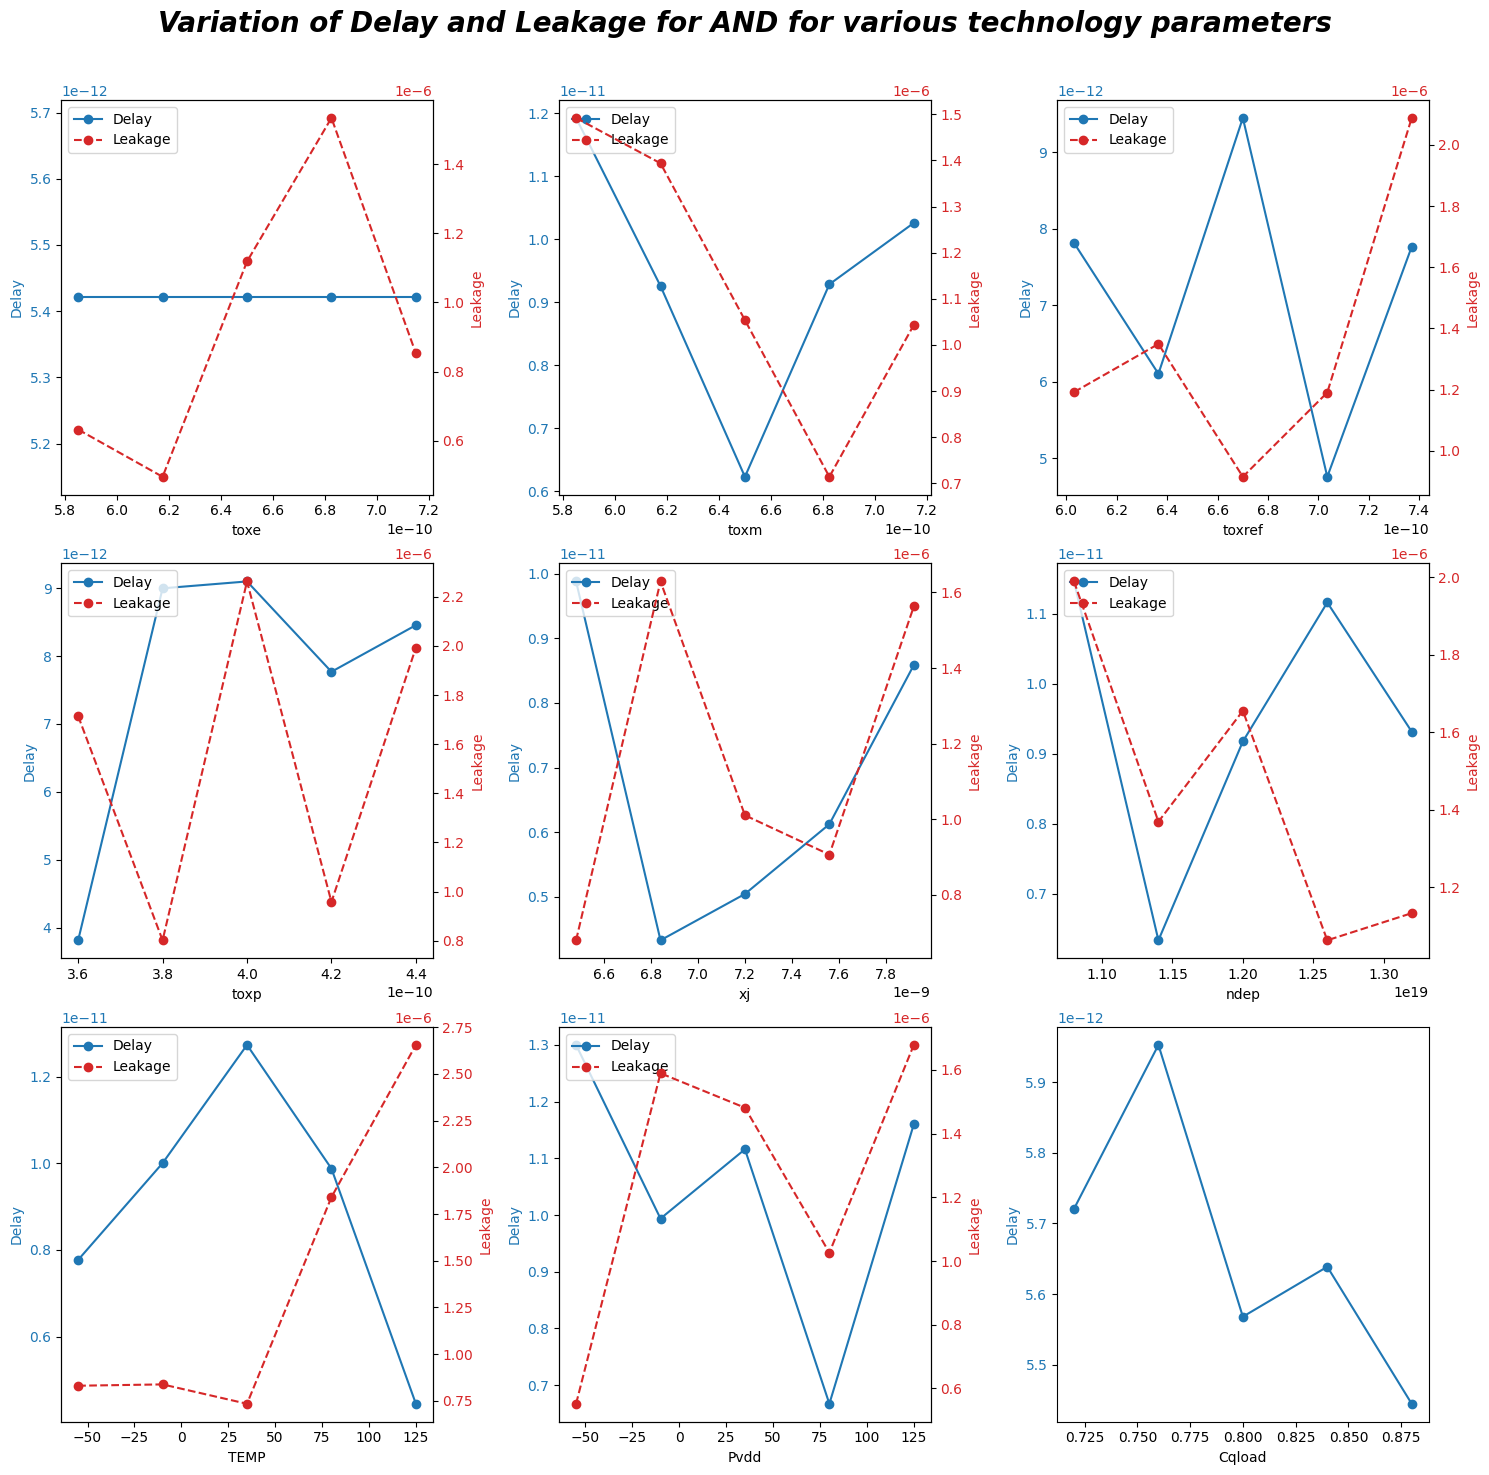

In [31]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data2 = [
    (axs[0, 0], toxe_list, delay_list_toxe, 'toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, delay_list_toxm, 'toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, delay_list_toxref, 'toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, delay_list_toxp, 'toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, delay_list_xj, 'xj', leakage_list_xj),
    (axs[1, 2], ndep_list, delay_list_ndep, 'ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, delay_list_temp, 'TEMP', leakage_list_temp),
    (axs[2, 1], temp_list, delay_list_pvdd, 'Pvdd', leakage_list_pvdd),
    (axs[2, 2], cqload_list, delay_list_cqload, 'Cqload', None)
]

for ax, x, param1, xlabel, param2 in data2:
    plot_dual_axis(ax, x, param1, xlabel, param2)

plt.tight_layout()
fig.suptitle('Variation of Delay and Leakage for AND for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.savefig('Dual_axis_plots/22_nm_MGK_AND2.png')
plt.show()


# 5. AND3

Loading the File path

In [32]:
file_path = "AND_3_leakage.csv"  # Provide the path to your CSV file
df_and3_leakage = pd.read_csv(file_path)

In [33]:
file_path = "AND_3_delay.csv"  # Provide the path to your CSV file
df_and3_delay = pd.read_csv(file_path)

## 5.1 Temparature

In [34]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_and3_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)

## Delay List
target_column = 'delay_nodea'
delay_list_temp = nearest_values_average(df_and3_delay, temp_list, column_name,target_column)
print(delay_list_temp)

[1.1069702414556481e-06, 1.109948844245594e-06, 9.473255807866093e-07, 2.293943377217472e-06, 3.172104316632872e-06]
[8.6521805e-12, 1.104417e-11, 1.402831e-11, 1.091584e-11, 5.151691e-12]


## 5.2 Pvdd

In [35]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_and3_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)

## Delay List
target_column = 'delay_nodea'
delay_list_pvdd = nearest_values_average(df_and3_delay, pvdd_list, column_name,target_column)
print(delay_list_pvdd)

[7.306403095170622e-07, 1.897628549238624e-06, 1.8334012803765706e-06, 1.3560700450280195e-06, 2.143708660659393e-06]
[1.4442245e-11, 1.105929e-11, 1.233605e-11, 7.63139e-12, 1.2654385e-11]


## 5.3 Cqload

In [36]:
## Leakage List
column_name = 'Cqload'  # Specify the column name

## Delay List
target_column = 'delay_nodea'
delay_list_cqload = nearest_values_average(df_and3_delay, cqload_list, column_name,target_column)
print(delay_list_cqload)

[6.6560565e-12, 6.811802e-12, 6.499998000000001e-12, 6.5123645e-12, 6.345972000000001e-12]


## 5.4 toxe

In [37]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_and3_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)

## Delay List
target_column = 'delay_nodea'
delay_list_toxe = nearest_values_average(df_and3_delay, pvdd_list, column_name,target_column)
print(delay_list_toxe)

[8.251919208511806e-07, 6.652597209866079e-07, 1.4734611594523954e-06, 1.9310131600564676e-06, 1.0841978981862947e-06]
[6.2567194999999985e-12, 6.2567194999999985e-12, 6.2567194999999985e-12, 6.2567194999999985e-12, 6.2567194999999985e-12]


## 5.5 toxm

In [38]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_and3_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)

## Delay List
target_column = 'delay_nodea'
delay_list_toxm = nearest_values_average(df_and3_delay, toxm_list, column_name,target_column)
print(delay_list_toxm)

[1.8634600382587928e-06, 1.7755120040731636e-06, 1.2922027581891538e-06, 9.53515189982493e-07, 1.3885376087038026e-06]
[1.3107825e-11, 1.0176322e-11, 7.1596595e-12, 1.0416014e-11, 1.122779e-11]


## 5.6 toxref

In [39]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_and3_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)

## Delay List
target_column = 'delay_nodea'
delay_list_toxref = nearest_values_average(df_and3_delay, toxref_list, column_name,target_column)
print(delay_list_toxref)

[1.5545911100881478e-06, 1.6872252776163056e-06, 1.2122093214009209e-06, 1.5279281143411677e-06, 2.5111434782824808e-06]
[8.645697999999999e-12, 6.935676e-12, 1.0483985e-11, 5.5801255e-12, 8.7874365e-12]


## 5.7 toxp

In [40]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_and3_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)

## Delay List
target_column = 'delay_nodea'
delay_list_toxp = nearest_values_average(df_and3_delay, toxp_par_list, column_name,target_column)
print(delay_list_toxp)

[2.0144849277148204e-06, 1.0627194076389817e-06, 2.6433584210278126e-06, 1.2775752171759127e-06, 2.4055165483957266e-06]
[4.5039215e-12, 1.0095486e-11, 1.0035357e-11, 8.685392e-12, 9.3289995e-12]


## 5.8 xj

In [41]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_and3_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)

## Delay List
target_column = 'delay_nodea'
delay_list_xj = nearest_values_average(df_and3_delay, xj_list, column_name,target_column)
print(delay_list_xj)

[8.953896564294136e-07, 1.9858602603513643e-06, 1.335537293614474e-06, 1.2101510746821854e-06, 1.9132310910179677e-06]
[1.0845586e-11, 4.947277e-12, 5.797165e-12, 6.9737485e-12, 9.545563e-12]


## 5.9 ndep

In [42]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_and3_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)

## Delay List
target_column = 'delay_nodea'
delay_list_ndep = nearest_values_average(df_and3_delay, ndep_list, column_name,target_column)
print(delay_list_ndep)

[2.4626511910574193e-06, 1.7239944918285729e-06, 2.0416270761138967e-06, 1.360081289404007e-06, 1.3760963042583258e-06]
[1.2513955e-11, 7.222105e-12, 1.0167076e-11, 1.238242e-11, 1.0462676e-11]


## 5.10 Plotting all plots

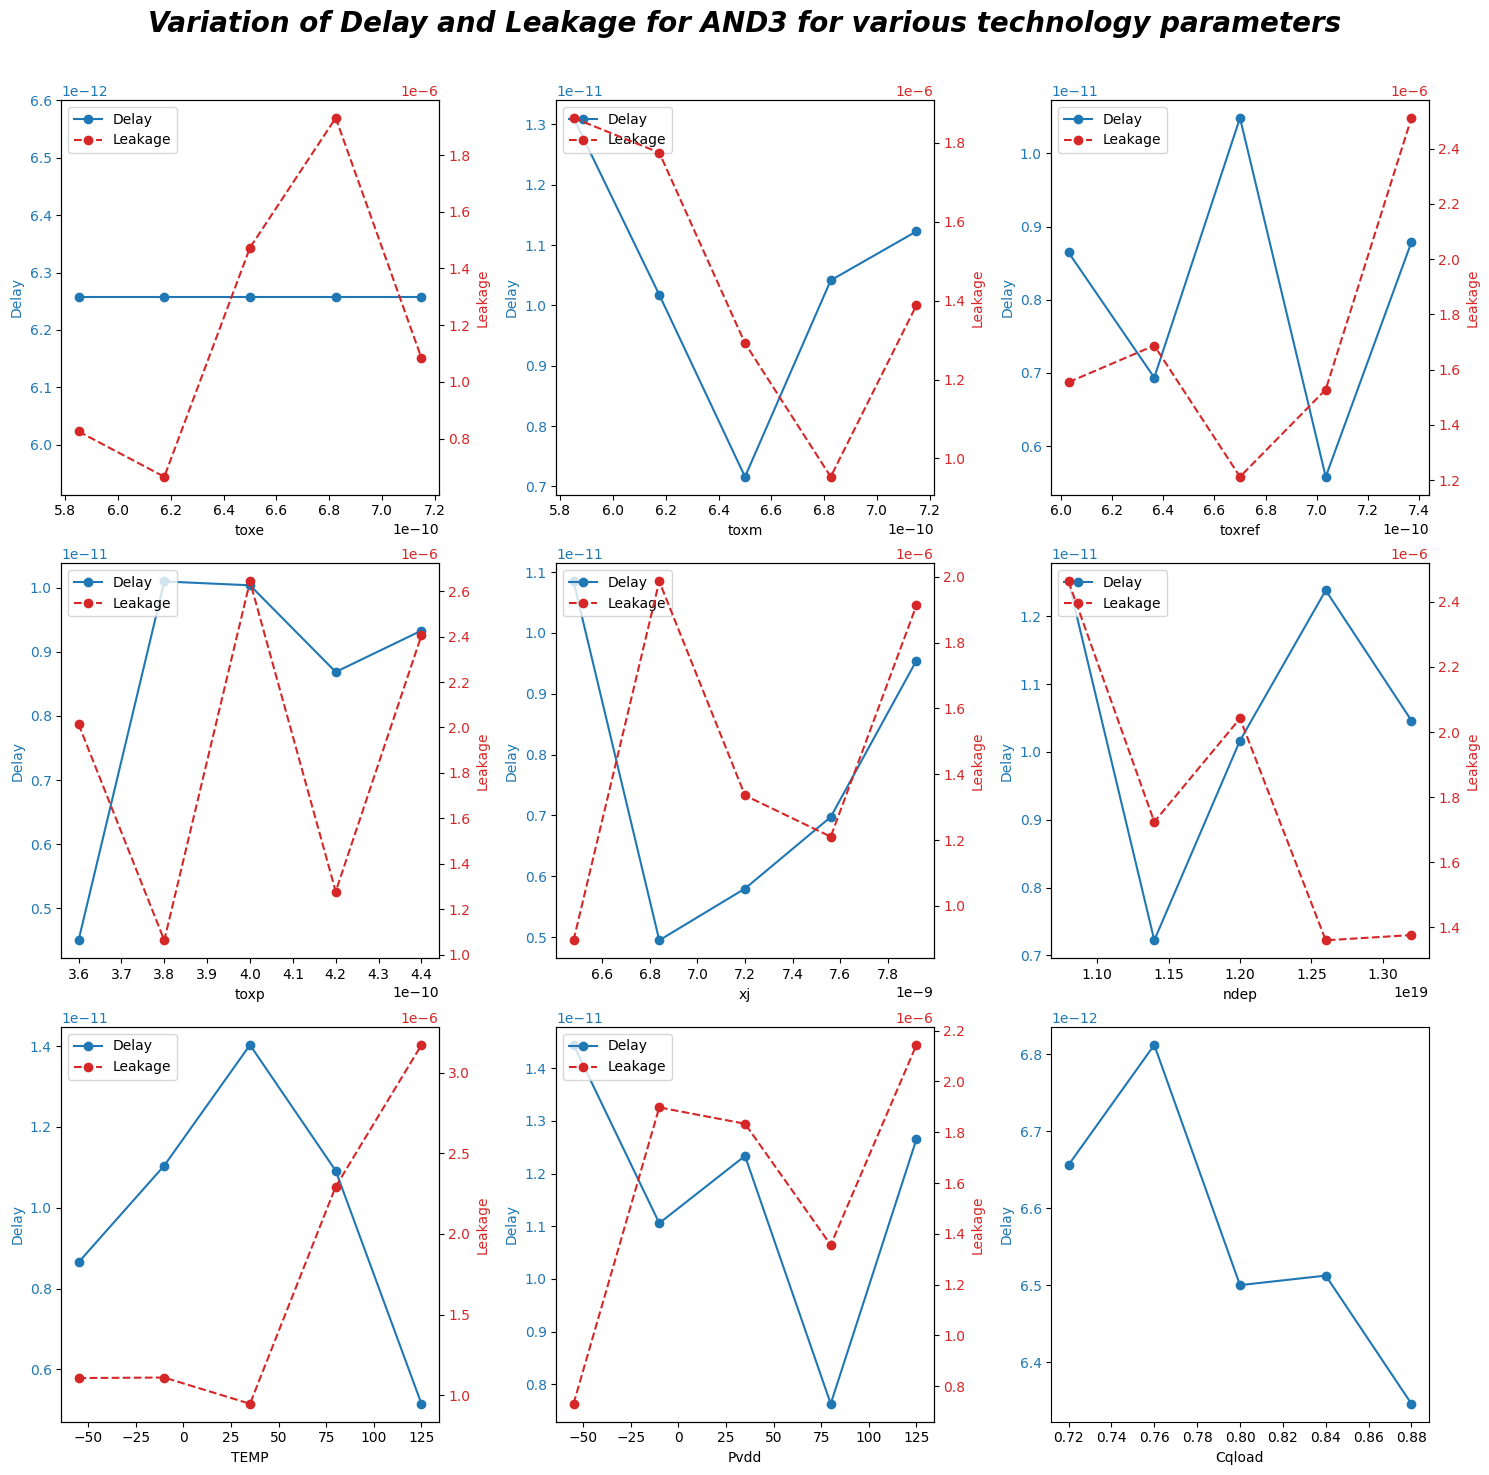

In [43]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data3 = [
    (axs[0, 0], toxe_list, delay_list_toxe, 'toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, delay_list_toxm, 'toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, delay_list_toxref, 'toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, delay_list_toxp, 'toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, delay_list_xj, 'xj', leakage_list_xj),
    (axs[1, 2], ndep_list, delay_list_ndep, 'ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, delay_list_temp, 'TEMP', leakage_list_temp),
    (axs[2, 1], temp_list, delay_list_pvdd, 'Pvdd', leakage_list_pvdd),
    (axs[2, 2], cqload_list, delay_list_cqload, 'Cqload', None)
]

for ax, x, param1, xlabel, param2 in data3:
    plot_dual_axis(ax, x, param1, xlabel, param2)

plt.tight_layout()
fig.suptitle('Variation of Delay and Leakage for AND3 for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.savefig('Dual_axis_plots/22_nm_MGK_AND3.png')
plt.show()


# 6. OR2

Loading the File path

In [44]:
file_path = "OR_2_leakage.csv"  # Provide the path to your CSV file
df_or2_leakage = pd.read_csv(file_path)

In [45]:
file_path = "AND_3_delay.csv"  # Provide the path to your CSV file
df_or2_delay = pd.read_csv(file_path)

## 6.1 Temparature

In [46]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_or2_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)

## Delay List
target_column = 'delay_nodea'
delay_list_temp = nearest_values_average(df_or2_delay, temp_list, column_name,target_column)
print(delay_list_temp)

[7.102004698995323e-07, 8.633373298282388e-07, 7.232774194722775e-07, 2.293993777089246e-06, 3.5001345620194364e-06]
[8.6521805e-12, 1.104417e-11, 1.402831e-11, 1.091584e-11, 5.151691e-12]


## 6.2 Pvdd

In [47]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_or2_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)

## Delay List
target_column = 'delay_nodea'
delay_list_pvdd = nearest_values_average(df_or2_delay, pvdd_list, column_name,target_column)
print(delay_list_pvdd)

[5.899905020243911e-07, 2.1515389976535397e-06, 1.9018455896886423e-06, 9.115844146287228e-07, 1.643977824108629e-06]
[1.4442245e-11, 1.105929e-11, 1.233605e-11, 7.63139e-12, 1.2654385e-11]


## 6.3 Cqload

In [48]:
## Leakage List
column_name = 'Cqload'  # Specify the column name

## Delay List
target_column = 'delay_nodea'
delay_list_cqload = nearest_values_average(df_or2_delay, cqload_list, column_name,target_column)
print(delay_list_cqload)

[6.6560565e-12, 6.811802e-12, 6.499998000000001e-12, 6.5123645e-12, 6.345972000000001e-12]


## 6.4 toxe

In [49]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_or2_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)

## Delay List
target_column = 'delay_nodea'
delay_list_toxe = nearest_values_average(df_or2_delay, pvdd_list, column_name,target_column)
print(delay_list_toxe)

[5.909900580412195e-07, 4.978586762176913e-07, 1.014835614454834e-06, 1.5634338329703595e-06, 1.0234186806603298e-06]
[6.2567194999999985e-12, 6.2567194999999985e-12, 6.2567194999999985e-12, 6.2567194999999985e-12, 6.2567194999999985e-12]


## 6.5 toxm

In [50]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_or2_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)

## Delay List
target_column = 'delay_nodea'
delay_list_toxm = nearest_values_average(df_or2_delay, toxm_list, column_name,target_column)
print(delay_list_toxm)

[1.861829604097764e-06, 1.339159923174128e-06, 1.3282059558700379e-06, 6.155965394467599e-07, 1.0412144731194551e-06]
[1.3107825e-11, 1.0176322e-11, 7.1596595e-12, 1.0416014e-11, 1.122779e-11]


## 6.6 toxref

In [51]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_or2_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)

## Delay List
target_column = 'delay_nodea'
delay_list_toxref = nearest_values_average(df_or2_delay, toxref_list, column_name,target_column)
print(delay_list_toxref)

[1.06313012147242e-06, 1.3326228142431486e-06, 7.996834038295862e-07, 1.1639121604112578e-06, 2.835233662009118e-06]
[8.645697999999999e-12, 6.935676e-12, 1.0483985e-11, 5.5801255e-12, 8.7874365e-12]


## 6.7 toxp

In [52]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_or2_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)

## Delay List
target_column = 'delay_nodea'
delay_list_toxp = nearest_values_average(df_or2_delay, toxp_par_list, column_name,target_column)
print(delay_list_toxp)

[2.2901537601464157e-06, 8.314935965534688e-07, 3.0274109772410655e-06, 8.05288709648765e-07, 2.5351341267417192e-06]
[4.5039215e-12, 1.0095486e-11, 1.0035357e-11, 8.685392e-12, 9.3289995e-12]


## 6.8 xj

In [53]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_or2_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)

## Delay List
target_column = 'delay_nodea'
delay_list_xj = nearest_values_average(df_or2_delay, xj_list, column_name,target_column)
print(delay_list_xj)

[6.047854469449475e-07, 1.6106417806588521e-06, 1.0364120432520655e-06, 8.957640261372202e-07, 1.9894442626387516e-06]
[1.0845586e-11, 4.947277e-12, 5.797165e-12, 6.9737485e-12, 9.545563e-12]


## 6.9 ndep

In [54]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_or2_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)

## Delay List
target_column = 'delay_nodea'
delay_list_ndep = nearest_values_average(df_or2_delay, ndep_list, column_name,target_column)
print(delay_list_ndep)

[2.5147495286104447e-06, 1.3703014094966402e-06, 1.7460639621661455e-06, 1.0707744881842968e-06, 1.2541526172206076e-06]
[1.2513955e-11, 7.222105e-12, 1.0167076e-11, 1.238242e-11, 1.0462676e-11]


## 6.10 Plotting all plots

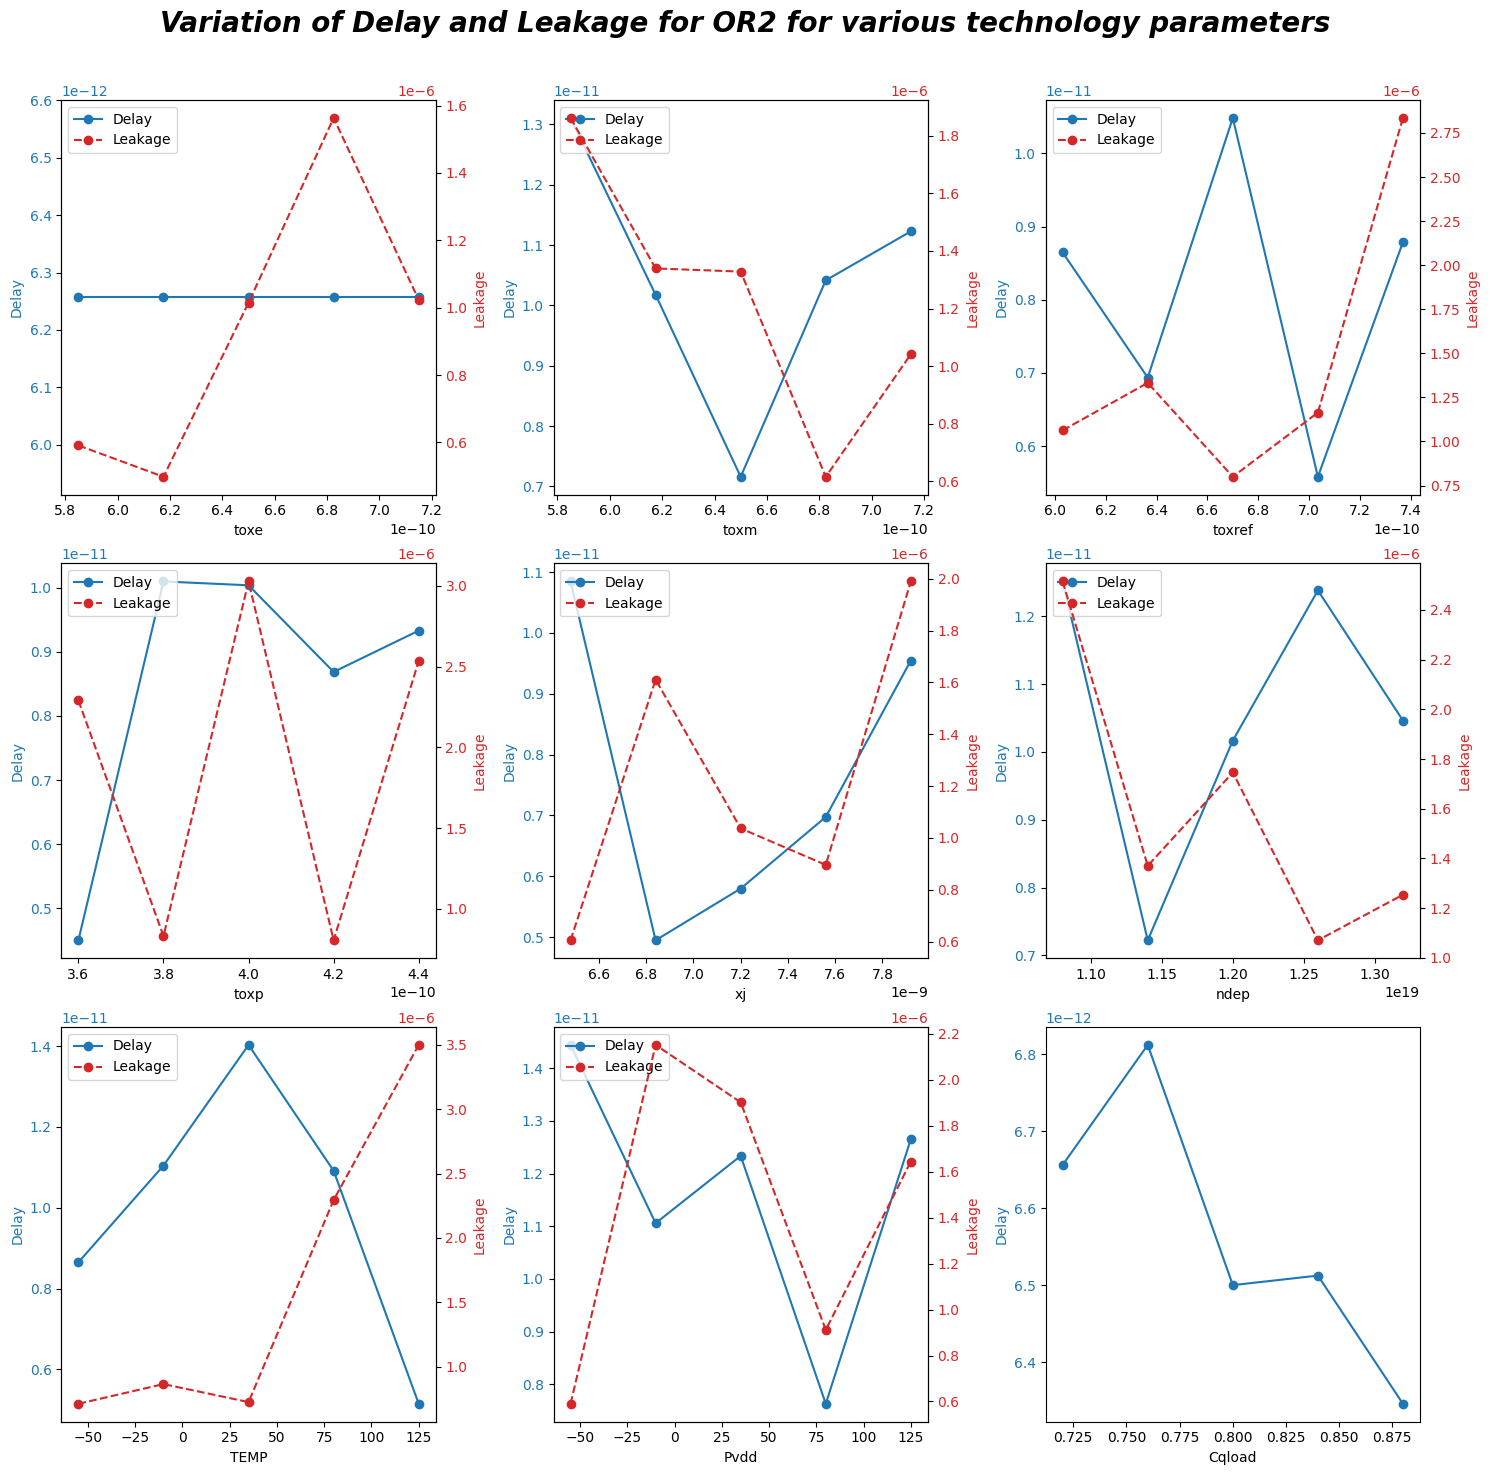

In [55]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data4 = [
    (axs[0, 0], toxe_list, delay_list_toxe, 'toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, delay_list_toxm, 'toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, delay_list_toxref, 'toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, delay_list_toxp, 'toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, delay_list_xj, 'xj', leakage_list_xj),
    (axs[1, 2], ndep_list, delay_list_ndep, 'ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, delay_list_temp, 'TEMP', leakage_list_temp),
    (axs[2, 1], temp_list, delay_list_pvdd, 'Pvdd', leakage_list_pvdd),
    (axs[2, 2], cqload_list, delay_list_cqload, 'Cqload', None)
]

for ax, x, param1, xlabel, param2 in data4:
    plot_dual_axis(ax, x, param1, xlabel, param2)

plt.tight_layout()
fig.suptitle('Variation of Delay and Leakage for OR2 for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.savefig('Dual_axis_plots/22_nm_MGK_OR2.png')
plt.show()


# 7. XOR

Loading the File path

In [56]:
file_path = "OR_2_leakage.csv"  # Provide the path to your CSV file
df_xor_leakage = pd.read_csv(file_path)

In [57]:
file_path = "AND_3_delay.csv"  # Provide the path to your CSV file
df_xor_delay = pd.read_csv(file_path)

## 7.1 Temparature

In [58]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_xor_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)

## Delay List
target_column = 'delay_nodea'
delay_list_temp = nearest_values_average(df_xor_delay, temp_list, column_name,target_column)
print(delay_list_temp)

[7.102004698995323e-07, 8.633373298282388e-07, 7.232774194722775e-07, 2.293993777089246e-06, 3.5001345620194364e-06]
[8.6521805e-12, 1.104417e-11, 1.402831e-11, 1.091584e-11, 5.151691e-12]


## 7.2 Pvdd

In [59]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_xor_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)

## Delay List
target_column = 'delay_nodea'
delay_list_pvdd = nearest_values_average(df_xor_delay, pvdd_list, column_name,target_column)
print(delay_list_pvdd)

[5.899905020243911e-07, 2.1515389976535397e-06, 1.9018455896886423e-06, 9.115844146287228e-07, 1.643977824108629e-06]
[1.4442245e-11, 1.105929e-11, 1.233605e-11, 7.63139e-12, 1.2654385e-11]


## 7.3 Cqload

In [60]:
## Leakage List
column_name = 'Cqload'  # Specify the column name

## Delay List
target_column = 'delay_nodea'
delay_list_cqload = nearest_values_average(df_xor_delay, cqload_list, column_name,target_column)
print(delay_list_cqload)

[6.6560565e-12, 6.811802e-12, 6.499998000000001e-12, 6.5123645e-12, 6.345972000000001e-12]


## 7.4 toxe

In [61]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_xor_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)

## Delay List
target_column = 'delay_nodea'
delay_list_toxe = nearest_values_average(df_xor_delay, pvdd_list, column_name,target_column)
print(delay_list_toxe)

[5.909900580412195e-07, 4.978586762176913e-07, 1.014835614454834e-06, 1.5634338329703595e-06, 1.0234186806603298e-06]
[6.2567194999999985e-12, 6.2567194999999985e-12, 6.2567194999999985e-12, 6.2567194999999985e-12, 6.2567194999999985e-12]


## 7.5 toxm

In [62]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_xor_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)

## Delay List
target_column = 'delay_nodea'
delay_list_toxm = nearest_values_average(df_xor_delay, toxm_list, column_name,target_column)
print(delay_list_toxm)

[1.861829604097764e-06, 1.339159923174128e-06, 1.3282059558700379e-06, 6.155965394467599e-07, 1.0412144731194551e-06]
[1.3107825e-11, 1.0176322e-11, 7.1596595e-12, 1.0416014e-11, 1.122779e-11]


## 7.6 toxref

In [63]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_xor_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)

## Delay List
target_column = 'delay_nodea'
delay_list_toxref = nearest_values_average(df_xor_delay, toxref_list, column_name,target_column)
print(delay_list_toxref)

[1.06313012147242e-06, 1.3326228142431486e-06, 7.996834038295862e-07, 1.1639121604112578e-06, 2.835233662009118e-06]
[8.645697999999999e-12, 6.935676e-12, 1.0483985e-11, 5.5801255e-12, 8.7874365e-12]


## 7.7 toxp

In [64]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_xor_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)

## Delay List
target_column = 'delay_nodea'
delay_list_toxp = nearest_values_average(df_xor_delay, toxp_par_list, column_name,target_column)
print(delay_list_toxp)

[2.2901537601464157e-06, 8.314935965534688e-07, 3.0274109772410655e-06, 8.05288709648765e-07, 2.5351341267417192e-06]
[4.5039215e-12, 1.0095486e-11, 1.0035357e-11, 8.685392e-12, 9.3289995e-12]


## 7.8 xj

In [65]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_xor_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)

## Delay List
target_column = 'delay_nodea'
delay_list_xj = nearest_values_average(df_xor_delay, xj_list, column_name,target_column)
print(delay_list_xj)

[6.047854469449475e-07, 1.6106417806588521e-06, 1.0364120432520655e-06, 8.957640261372202e-07, 1.9894442626387516e-06]
[1.0845586e-11, 4.947277e-12, 5.797165e-12, 6.9737485e-12, 9.545563e-12]


## 7.9 ndep

In [66]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_xor_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)

## Delay List
target_column = 'delay_nodea'
delay_list_ndep = nearest_values_average(df_xor_delay, ndep_list, column_name,target_column)
print(delay_list_ndep)

[2.5147495286104447e-06, 1.3703014094966402e-06, 1.7460639621661455e-06, 1.0707744881842968e-06, 1.2541526172206076e-06]
[1.2513955e-11, 7.222105e-12, 1.0167076e-11, 1.238242e-11, 1.0462676e-11]


## 7.10 Plotting all plots

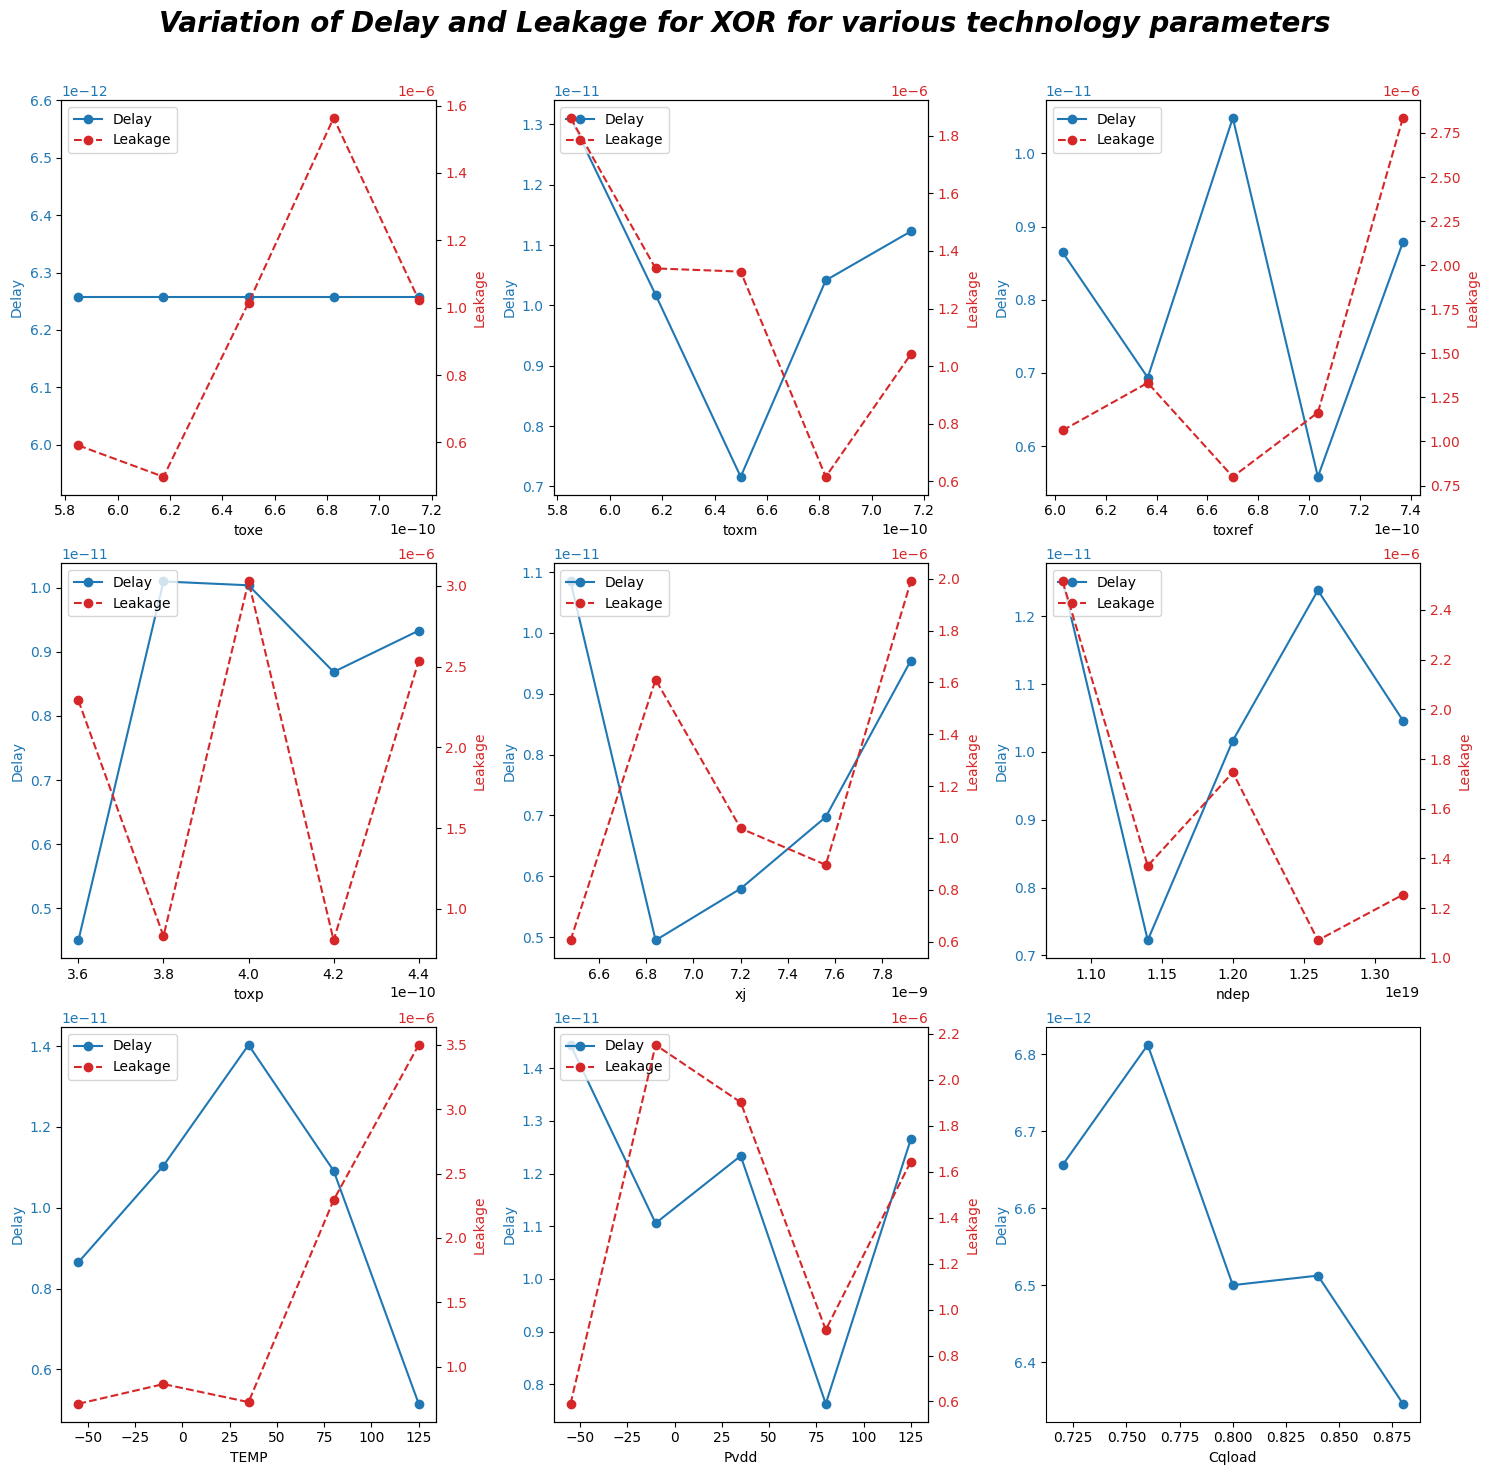

In [67]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data5 = [
    (axs[0, 0], toxe_list, delay_list_toxe, 'toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, delay_list_toxm, 'toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, delay_list_toxref, 'toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, delay_list_toxp, 'toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, delay_list_xj, 'xj', leakage_list_xj),
    (axs[1, 2], ndep_list, delay_list_ndep, 'ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, delay_list_temp, 'TEMP', leakage_list_temp),
    (axs[2, 1], temp_list, delay_list_pvdd, 'Pvdd', leakage_list_pvdd),
    (axs[2, 2], cqload_list, delay_list_cqload, 'Cqload', None)
]

for ax, x, param1, xlabel, param2 in data5:
    plot_dual_axis(ax, x, param1, xlabel, param2)

plt.tight_layout()
fig.suptitle('Variation of Delay and Leakage for XOR for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.savefig('Dual_axis_plots/22_nm_MGK_XOR.png')
plt.show()
